In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [104]:
raw_data = {}
list_of_coins = ['BTC', 'ETH', 'MATIC', 'GRT', 'TRX', 'XRP', 'APT', 'SUI', 'OP', 'DYDX', 'WOO', 
                 'FET', 'OCEAN', 'ANKR', 'LINK', 'FLOW', 'DUSK', 'FTM', 'AVAX', 'BNB',
                 'ALGO', 'SAND', 'SOL', 'ADA', 'DOT', 'LTC', 'XLM', 'EOS', 'DOGE', 
                 'XMR', 'XTZ', 'ATOM', 'VET', 'NEO', 'AAVE', 'UNI', 'MKR', 'SNX', 'YFI']
for coin in list_of_coins:
    try:
        raw_data[coin] = yf.download(tickers=coin+'-USD', period='max', interval='1d', progress=False)
    except:
        print(coin)

In [105]:
raw_data['BNB'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [106]:
data = {}

#creating a new dataframe with only the closing price of each cryptocurrency
for i in raw_data:
    data[i] = raw_data[i]['Close']

In [107]:
data = pd.DataFrame(data)

In [108]:
for col in data.columns:
    if data[col].isnull().sum() > 400:
        data[col] = data[col].interpolate()

In [109]:
data.dropna(inplace=True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2022-03-18 to 2024-01-17
Freq: D
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     671 non-null    float64
 1   ETH     671 non-null    float64
 2   MATIC   671 non-null    float64
 3   GRT     671 non-null    float64
 4   TRX     671 non-null    float64
 5   XRP     671 non-null    float64
 6   APT     671 non-null    float64
 7   SUI     671 non-null    float64
 8   OP      671 non-null    float64
 9   DYDX    671 non-null    float64
 10  WOO     671 non-null    float64
 11  FET     671 non-null    float64
 12  OCEAN   671 non-null    float64
 13  ANKR    671 non-null    float64
 14  LINK    671 non-null    float64
 15  FLOW    671 non-null    float64
 16  DUSK    671 non-null    float64
 17  FTM     671 non-null    float64
 18  AVAX    671 non-null    float64
 19  BNB     671 non-null    float64
 20  ALGO    671 non-null    float64
 21  SAND    671 

In [111]:
daily_return = np.log(data.pct_change() + 1).dropna()
#Here I am calculating log daily returns and removing the first empty column of each coin

#Now calculating mean of those daily return
daily_return_mean = np.array(daily_return.mean())

#Now assigning weights to each coin
weights = np.array([1/len(daily_return_mean) for _ in range(0, len(daily_return_mean))])

In [112]:
daily_return_mean

array([ 2.70959629e-05, -2.32374320e-04, -9.26181915e-04,  1.45053423e-04,
        8.36969910e-04, -5.06281789e-04, -3.93133706e-03, -1.44388729e-03,
        1.24138118e-02, -6.86002742e-04, -4.36659592e-04,  1.05521037e-03,
       -1.37864932e-04, -1.58806534e-03,  5.08614026e-05, -2.89122405e-03,
       -8.68510114e-04, -1.70271775e-03, -1.29823812e-03, -3.79501822e-04,
       -2.06491084e-03, -2.76943782e-03,  1.67217658e-04, -7.24747870e-04,
       -1.43170813e-03, -7.18935163e-04, -7.30884144e-04, -1.54791747e-03,
       -5.95917459e-04, -3.35268907e-04, -1.58462584e-03, -1.55668647e-03,
       -7.53969866e-04, -8.68966408e-04, -7.01699709e-04,  1.09080112e-03,
       -4.42130446e-05, -5.11109677e-04, -1.44645701e-03])

In [113]:
#Calculating Portfolio Return
Port_return = np.sum(weights * daily_return_mean)

print(f'The Annual Return of Portfolio is {(Port_return * 365)*100}%')
#365 trading days in a year

The Annual Return of Portfolio is -18.370993742514568%


In [114]:
#Calculating Portfolio Volatility
cov = daily_return.cov()
Port_Vol = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))

print(f'The Annual Volatility of Portfolio is {Port_Vol * np.sqrt(365)*100}%')

The Annual Volatility of Portfolio is 73.9549006751407%


So far we have seen the Annual Return and Annual Volatility of Portfolio if equal weight given to each stock.
<br>
Now comes the random generation of portfolio i.e. Monte Carlo Simulation

In [115]:
#Declare the number of Portfolio to be generated
num_portfolio = 30000

#creating a empty list for storing returns,volatility,sharpe_ratio(return/volatility) and weightage of each coin in portfolio
results = np.zeros((3 + len(daily_return.columns),num_portfolio))



#Monte Carlo Simulation
for i in range(num_portfolio):
    
    weight = np.random.rand(len(daily_return.columns)) #Declaring random weights
    weight = weight/np.sum(weight) #So that sum of all weight will be equal to 1

    p_annual_return = np.sum(weight * daily_return_mean) * 365 #Annual Return
    p_annual_volatility = np.sqrt(np.dot(weight.T,np.dot(cov,weight))) * np.sqrt(365) #Annual Volatility
    
    #Storing the values in results list
    results[0,i] = p_annual_return
    results[1,i] = p_annual_volatility
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weight)):
        results[j+3,i] =  weight[j]
        
        
        
#Making a dataframe for results list of all generated Portfolio
cols = ['Ann_Ret','Ann_Vol','Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

result_df = pd.DataFrame(results.T,columns=cols)

In [116]:
#Visulising the result dataframe
result_df

,Ann_Ret,Ann_Vol,Sharpe_Ratio,BTC,ETH,MATIC,GRT,TRX,XRP,APT,SUI,OP,DYDX,WOO,FET,OCEAN,ANKR,LINK,FLOW,DUSK,FTM,AVAX,BNB,ALGO,SAND,SOL,ADA,DOT,LTC,XLM,EOS,DOGE,XMR,XTZ,ATOM,VET,NEO,AAVE,UNI,MKR,SNX,YFI
0,-0.214228,0.741148,-0.289048,0.001054,0.015272,0.002625,0.042932,0.005734,0.010013,0.004277,0.005464,0.021574,0.001586,0.038668,0.020190,0.008727,0.026684,0.024143,0.020856,0.025020,0.043999,0.048216,0.014803,0.054809,0.008046,0.045022,0.029367,0.043527,0.054474,0.016441,0.009223,0.029617,0.044573,0.038036,0.030568,0.050204,0.026090,0.054649,0.019784,0.012782,0.003346,0.047603
1,-0.248408,0.784876,-0.316494,0.029802,0.027164,0.001825,0.014792,0.002835,0.025502,0.026940,0.000513,0.009121,0.023065,0.023702,0.029348,0.042927,0.016047,0.044606,0.041443,0.004166,0.015668,0.024319,0.028112,0.008917,0.034717,0.043824,0.036591,0.035624,0.003434,0.034230,0.016231,0.043193,0.041819,0.043679,0.038771,0.023918,0.020241,0.034425,0.037707,0.043785,0.012245,0.014752
2,-0.185718,0.701959,-0.264571,0.001788,0.032881,0.021629,0.040432,0.026658,0.009783,0.010496,0.046591,0.017778,0.015882,0.034234,0.047938,0.035383,0.011896,0.003871,0.010053,0.043896,0.043883,0.018567,0.029662,0.012230,0.009245,0.048319,0.002933,0.036434,0.048333,0.035351,0.039590,0.033686,0.045564,0.018915,0.043250,0.047311,0.003166,0.004471,0.014023,0.006005,0.007366,0.040507
3,-0.284559,0.770527,-0.369305,0.041319,0.034410,0.028287,0.038971,0.000954,0.036209,0.012997,0.007609,0.001437,0.023709,0.038272,0.034311,0.036732,0.038736,0.000509,0.010363,0.019042,0.034550,0.013174,0.020830,0.041293,0.034637,0.015544,0.033540,0.029893,0.034515,0.007828,0.003819,0.036984,0.001025,0.030763,0.025505,0.028637,0.030649,0.047358,0.033248,0.036710,0.025127,0.030505
4,-0.314408,0.707227,-0.444565,0.038662,0.019060,0.035141,0.013843,0.011756,0.016959,0.034832,0.015958,0.018213,0.023106,0.005152,0.008954,0.045665,0.037889,0.014271,0.040157,0.040852,0.043525,0.014352,0.027141,0.040404,0.041694,0.001484,0.039488,0.030804,0.026359,0.016962,0.039779,0.040754,0.037710,0.043558,0.027306,0.016298,0.001863,0.013509,0.005912,0.017232,0.044760,0.008635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.199832,0.853756,-0.234062,0.024748,0.033904,0.013620,0.028564,0.025677,0.031624,0.028820,0.047604,0.014897,0.020989,0.052093,0.050280,0.008608,0.050528,0.047585,0.040377,0.031287,0.012007,0.010323,0.005559,0.025502,0.001983,0.017027,0.016538,0.030771,0.010135,0.005152,0.006370,0.025401,0.004066,0.034288,0.014116,0.015066,0.015718,0.038336,0.051479,0.032528,0.038074,0.038357
29996,-0.109598,0.843330,-0.129959,0.001365,0.039521,0.028569,0.038247,0.010465,0.044215,0.024657,0.011283,0.036025,0.023839,0.026031,0.036614,0.042792,0.025282,0.017265,0.025155,0.004411,0.037375,0.014315,0.014998,0.001208,0.046892,0.034192,0.033365,0.021320,0.046433,0.012259,0.016592,0.042648,0.001456,0.006079,0.031158,0.005097,0.035447,0.021138,0.044147,0.037257,0.034865,0.026023
29997,-0.135634,0.795040,-0.170600,0.017918,0.008799,0.043301,0.034487,0.017471,0.013574,0.024620,0.012640,0.026099,0.018979,0.006290,0.047380,0.026942,0.004542,0.028030,0.040761,0.021925,0.006558,0.003226,0.001186,0.014941,0.000409,0.021621,0.047318,0.024947,0.036993,0.044559,0.014518,0.046091,0.016660,0.047092,0.028572,0.029676,0.010626,0.041085,0.039368,0.049064,0.049583,0.032148
29998,-0.074086,0.786929,-0.094146,0.002375,0.012209,0.005996,0.006482,0.029937,0.019097,0.023995,0.000759,0.056240,0.031390,0.038417,0.015654,0.042687,0.006225,0.054170,0.000311,0.021095,0.033124,0.015092,0.020923,0.063409,0.054867,0.015052,0.021036,0.023275,0.011149,0.007067,0.052977,0.021470,0.032268,0.016598,0.041216,0.051227,0.017146,0.001901,0.011103,0.036356,0.032911,0.052796


In [117]:
#Portfolio 1 with highest Sharpe Ratio
max_sharpe_ratio = result_df.iloc[result_df['Sharpe_Ratio'].idxmax()]

#Portfolio 2 with lowest Volatility
volatility_lowest = result_df.iloc[result_df['Ann_Vol'].idxmin()]

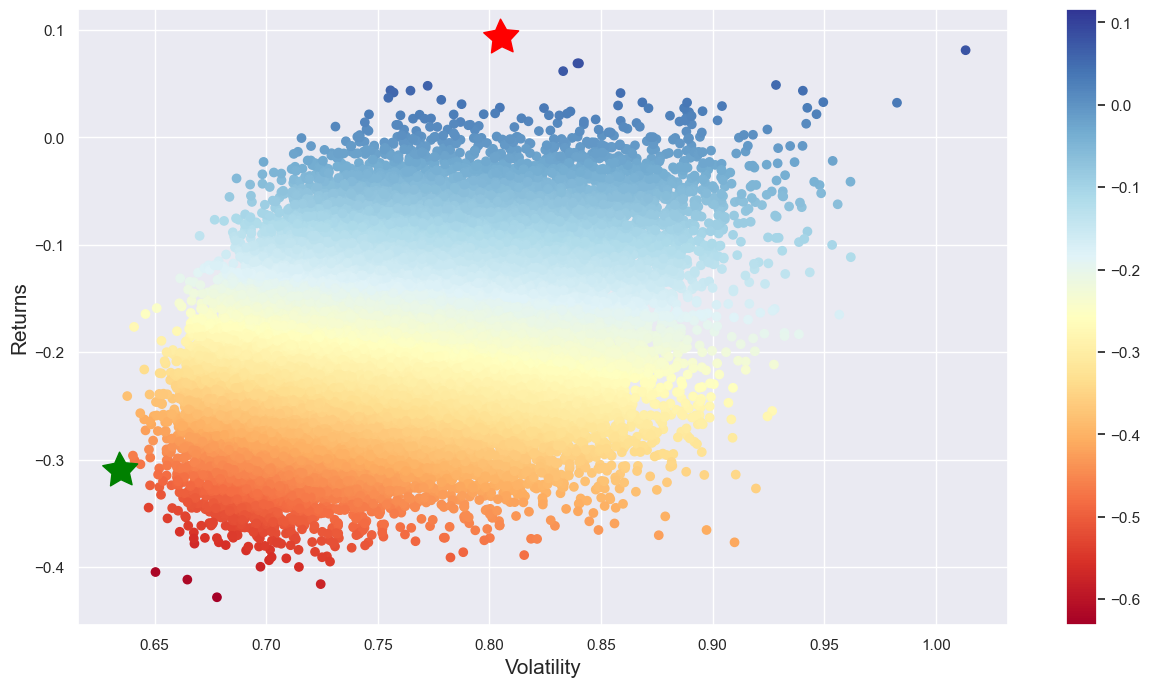

In [118]:

plt.figure(figsize=(15,8))
plt.scatter(result_df['Ann_Vol'],result_df['Ann_Ret'],c =result_df['Sharpe_Ratio'],cmap='RdYlBu')
plt.colorbar()

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker = (5,1,3),color='red',s=700) #Red - Portfolio 1
plt.scatter(volatility_lowest[1],volatility_lowest[0],marker = (5,1,3),color='green',s=700)#Green - Portfolio 2
            

plt.xlabel('Volatility',fontsize = 15)
plt.ylabel('Returns',fontsize = 15)
plt.show()

# Conclusion 

In [119]:
print('The Portfolio with maximum Return(or Sharpe_Ratio) is:')
print('All values in percentage')
print(round(max_sharpe_ratio.sort_values(ascending=False) * 100,2))

The Portfolio with maximum Return(or Sharpe_Ratio) is:
All values in percentage
Ann_Vol         80.50
Sharpe_Ratio    11.60
Ann_Ret          9.34
OP               5.03
XMR              4.85
TRX              4.79
FET              4.62
MKR              4.59
SOL              4.58
DOGE             4.45
BTC              4.24
OCEAN            4.15
ADA              4.07
GRT              3.90
UNI              3.62
XLM              3.40
LINK             3.36
VET              3.17
AAVE             3.10
DYDX             2.93
XTZ              2.78
SNX              2.59
WOO              2.44
MATIC            2.42
ATOM             2.29
NEO              2.23
BNB              2.19
DOT              2.11
LTC              1.61
EOS              1.56
YFI              1.49
ETH              1.33
DUSK             1.25
FTM              1.15
ANKR             0.95
AVAX             0.90
XRP              0.61
FLOW             0.58
APT              0.30
SAND             0.26
ALGO             0.08
SUI              0

In [120]:
print('The Portfolio with least Volatility is:')
print('All values in percentage')
print(round(volatility_lowest.sort_values(ascending=False) * 100,2))

The Portfolio with least Volatility is:
All values in percentage
Ann_Vol         63.46
SUI              5.41
GRT              5.37
APT              4.93
ETH              4.79
TRX              4.55
EOS              4.50
VET              4.27
XMR              3.93
NEO              3.91
DUSK             3.91
SNX              3.80
ADA              3.68
LTC              3.59
ALGO             3.48
XLM              3.37
LINK             3.30
ATOM             3.07
SOL              3.01
MKR              2.92
BNB              2.87
XRP              2.63
DOT              2.25
ANKR             2.16
SAND             2.13
AVAX             2.00
WOO              1.95
FTM              1.89
MATIC            1.54
OCEAN            1.03
XTZ              0.89
FET              0.83
BTC              0.44
DYDX             0.36
AAVE             0.30
DOGE             0.27
OP               0.27
FLOW             0.20
YFI              0.14
UNI              0.04
Ann_Ret        -30.98
Sharpe_Ratio   -48.82
Name: 18294